### Modelos de Classificação

https://github.com/ageron/handson-ml3 <br>
https://github.com/ageron/handson-ml2

### Etapas

1. Olhar para o quadro geral;
2. Obter os dados;
3. Descobrir e visualizar os dados para obter informações;
4. Preparar os dados para os algoritmos do Aprendizado de Máquina;
5. Selecionar e treinar um modelo;
6. Ajustar o seu modelo;
7. Apresentar sua solução;
8. Lançar, monitorar e manter seu sistema.


### Apendice B
#### Lista de Verificação do Projeto de Aprendizado de Máquina

1. Foque o problema e olhe para o quadro geral;
2. Obtenha os dados;
3. Explore os dados para obter insights;
4. Prepare os dados para melhor expor os padrões de dados subjacentes aos algoritmos do Aprendizado de Máquina;
5. Explore vários diferentes modelos e liste os melhores;
6. Ajuste seus modelos e combine-os em uma ótima solução;
7. Apresente sua solução;
8. Lance, monitore e faça a manutenção de seu sistema.

### Importando Dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
import matplotlib.pyplot as plt  

In [7]:
def show_image(image_data):
    X_image = image_data.reshape(28, 28)
    plt.imshow(X_image, cmap='binary')
    plt.show()

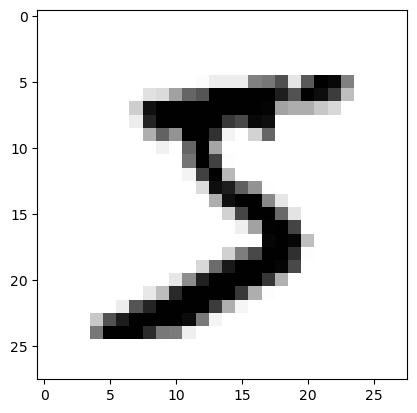

(None, '5')

In [8]:
some_digit = X[0]
show_image(some_digit), y[0]

### Dividindo o Dataset em Treino e Teste

In [9]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [11]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5') 

In [12]:
y_train_5, y_test_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

In [13]:
from sklearn.linear_model import SGDClassifier

sdg = SGDClassifier(random_state=42)
sdg.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sdg.predict(some_digit.reshape(1, -1))

array([ True, False, False, ...,  True, False, False])

### Avaliando o Modelo de Classificação

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sdg, x_train, y_train_5, cv=3, scoring='accuracy')

In [16]:
def display_results(scores): 
    print('Scores: ', scores)
    print('Média do score: ', f'{scores.mean(): .2f}')

In [17]:
display_results(scores)

Scores:  [0.95035 0.96035 0.9604 ]
Média do score:   0.96


In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train, y_train_5)

scores_dummmy = cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring='accuracy')
display_results(scores_dummmy)

Scores:  [0.90965 0.90965 0.90965]
Média do score:   0.91


##### Implementando código para Validação Cruzada:

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, make_scorer


def cross_validation_score(model, X, y, cv):
    skt = StratifiedKFold(n_splits=cv)
    for i, (train_index, test_index) in enumerate(skt.split(X, y)):

        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")    
        clone_model = clone(model)
        X_train_fold = X[train_index]
        y_train_fold = y[train_index]

        X_test_fold = X[test_index]
        y_test_fold = y[test_index]

        clone_model.fit(X_train_fold, y_train_fold)
        y_pred_fold = clone_model.predict(X_test_fold)

        score_fold = accuracy_score(y_test_fold, y_pred_fold)

        print(score_fold)

In [38]:
cross_validation_score(model=sdg, X = x_train, y = y_train_5, cv=3)

Fold 0:
  Train: index=[19964 19965 19966 ... 59997 59998 59999]
  Test:  index=[    0     1     2 ... 20331 20342 20359]
0.95035
Fold 1:
  Train: index=[    0     1     2 ... 59997 59998 59999]
  Test:  index=[19964 19965 19966 ... 40088 40125 40127]
0.96035
Fold 2:
  Train: index=[    0     1     2 ... 40088 40125 40127]
  Test:  index=[39988 39989 39990 ... 59997 59998 59999]
0.9604


In [39]:
cross_val_score(sdg, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [41]:
from sklearn.model_selection import cross_val_predict

y_pred_5 = cross_val_predict(sdg, x_train, y_train_5, cv=3)
print(y_pred_5)


[ True False False ...  True False False]


Each row in a confusion matrix represents an actual class, while each column
represents a predicted class. The first row of this matrix considers non-5
images (the negative class): 53,892 of them were correctly classified as non-
5s (they are called true negatives), while the remaining 687 were wrongly
classified as 5s (false positives, also called type I errors). The second row
considers the images of 5s (the positive class): 1,891 were wrongly classified
as non-5s (false negatives, also called type II errors), while the remaining
3,530 were correctly classified as 5s (true positives). A perfect classifier
would only have true positives and true negatives, so its confusion matrix
would have nonzero values only on its main diagonal (top left to bottom
right):

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_pred_5)
cm


TP = cm[1, 1]
TN = cm[0,0]
FN = cm[1, 0]
FP = cm[0, 1]

print('Matriz de confusão\n',cm)
print('Verdadeiros positivos:', TP)
print('Verdadeiros negativos:', TN)
print('Falsos negativos:', FN)
print('Falsos positivos:', FP)


Matriz de confusão
 [[53892   687]
 [ 1891  3530]]
Verdadeiros positivos: 3530
Verdadeiros negativos: 53892
Falsos negativos: 1891
Falsos positivos: 687


In [44]:
y_pred_perfect = y_train_5

cm_perfect = confusion_matrix(y_train_5, y_pred_perfect)
cm_perfect

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [55]:
# Precision

precision_ = round(TP / (TP + FP) * 100, 2)


# Recall or Sensitivity

recall_ = round(TP / (TP + FN) * 100, 2)

In [56]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_pred_5)
recall = recall_score(y_train_5, y_pred_5)

Now our 5-detector does not look as shiny as it did when we looked at its
accuracy. When it claims an image represents a 5, it is correct only 83.7% of
the time. Moreover, it only detects 65.1% of the 5s.


In [60]:
print('Recall:', recall_, f'{recall*100: .2f}')
print('Precision:', precision_, f'{precision*100: .2f}')

Recall: 65.12  65.12
Precision: 83.71  83.71
